In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of Deprenyl (Metabolite_id = 1965)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 1965; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                       price  amount unity                  provider_name
date                                                                     
2017-10-16 18:33:52    58.00  100.00    mg  Enamine Ltd Chemspace partner
2017-10-16 18:33:52    82.00  250.00    mg  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   152.00  500.00    mg  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   228.00    1.00     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   446.00   25.00     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   660.00    5.00     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   978.00   10.00     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    58.00  100.00    mg  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    82.00  250.00    mg  Enamine Ltd Chemspace partner
2017-11-22 19:12:59   152.00  500.00    mg  Enamine Ltd Chemspace partner
2017-11-22 19:12:59   228.00    1.00     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59   446.00   25.00  

In [5]:
df.unity.unique()

array(['mg', 'g'], dtype=object)

In [6]:
# Converter mg em g!!
df.amount = np.where(df.unity == 'mg', df.amount/1000, df.amount)  # where True, yield x, otherwise yield y
df = df.replace({'mg':'g'})
print(df)

                       price  amount unity                  provider_name
date                                                                     
2017-10-16 18:33:52    58.00   0.100     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52    82.00   0.250     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   152.00   0.500     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   228.00   1.000     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   446.00  25.000     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   660.00   5.000     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52   978.00  10.000     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    58.00   0.100     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    82.00   0.250     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59   152.00   0.500     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59   228.00   1.000     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59   446.00  25.000  

In [7]:
df.unity.unique()

array(['g'], dtype=object)

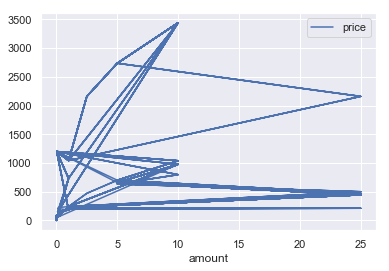

In [8]:
df.plot('amount')

In [9]:
#Converter tudo a 1g e preços respetivos
df.price = np.where(df.amount != 1, df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.amount != 1, 1, df.amount)
print(df)

                        price  amount unity                  provider_name
date                                                                      
2017-10-16 18:33:52    580.00     1.0     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52    328.00     1.0     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52    304.00     1.0     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52    228.00     1.0     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52     17.84     1.0     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52    132.00     1.0     g  Enamine Ltd Chemspace partner
2017-10-16 18:33:52     97.80     1.0     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    580.00     1.0     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    328.00     1.0     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    304.00     1.0     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59    228.00     1.0     g  Enamine Ltd Chemspace partner
2017-11-22 19:12:59     1

In [10]:
#See results grouped by provider_name
grouped_df = df.groupby('provider_name')

for key, item in grouped_df:
    print('Providers:', key)
    print(grouped_df.get_group(key), "\n\n")

Providers: ACC Corporation
                      price  amount unity    provider_name
date                                                      
2017-11-22 19:12:59  733.43     1.0     g  ACC Corporation
2017-12-22 19:18:05  733.43     1.0     g  ACC Corporation
2018-02-08 19:06:10  733.43     1.0     g  ACC Corporation
2018-03-08 19:08:49  733.43     1.0     g  ACC Corporation
2018-04-08 18:09:03  733.43     1.0     g  ACC Corporation
2018-05-08 18:11:25  733.43     1.0     g  ACC Corporation
2018-06-09 02:18:45  733.43     1.0     g  ACC Corporation
2018-07-09 02:19:07  733.43     1.0     g  ACC Corporation
2018-08-09 17:55:41  733.43     1.0     g  ACC Corporation
2018-09-09 17:59:44  733.43     1.0     g  ACC Corporation
2018-10-09 17:59:47  733.43     1.0     g  ACC Corporation
2018-11-09 18:59:50  733.43     1.0     g  ACC Corporation 


Providers: Enamine Ltd Chemspace partner
                       price  amount unity                  provider_name
date                         

In [11]:
gr_df2 = df.groupby('provider_name')['price']
for key, item in gr_df2:
    print(key, gr_df2.get_group(key), '\n')

ACC Corporation date
2017-11-22 19:12:59    733.43
2017-12-22 19:18:05    733.43
2018-02-08 19:06:10    733.43
2018-03-08 19:08:49    733.43
2018-04-08 18:09:03    733.43
2018-05-08 18:11:25    733.43
2018-06-09 02:18:45    733.43
2018-07-09 02:19:07    733.43
2018-08-09 17:55:41    733.43
2018-09-09 17:59:44    733.43
2018-10-09 17:59:47    733.43
2018-11-09 18:59:50    733.43
Name: price, dtype: float64 

Enamine Ltd Chemspace partner date
2017-10-16 18:33:52     580.00
2017-10-16 18:33:52     328.00
2017-10-16 18:33:52     304.00
2017-10-16 18:33:52     228.00
2017-10-16 18:33:52      17.84
2017-10-16 18:33:52     132.00
2017-10-16 18:33:52      97.80
2017-11-22 19:12:59     580.00
2017-11-22 19:12:59     328.00
2017-11-22 19:12:59     304.00
2017-11-22 19:12:59     228.00
2017-11-22 19:12:59      17.84
2017-11-22 19:12:59     132.00
2017-11-22 19:12:59      97.80
2017-12-22 19:18:05     580.00
2017-12-22 19:18:05     328.00
2017-12-22 19:18:05     304.00
2017-12-22 19:18:05     228

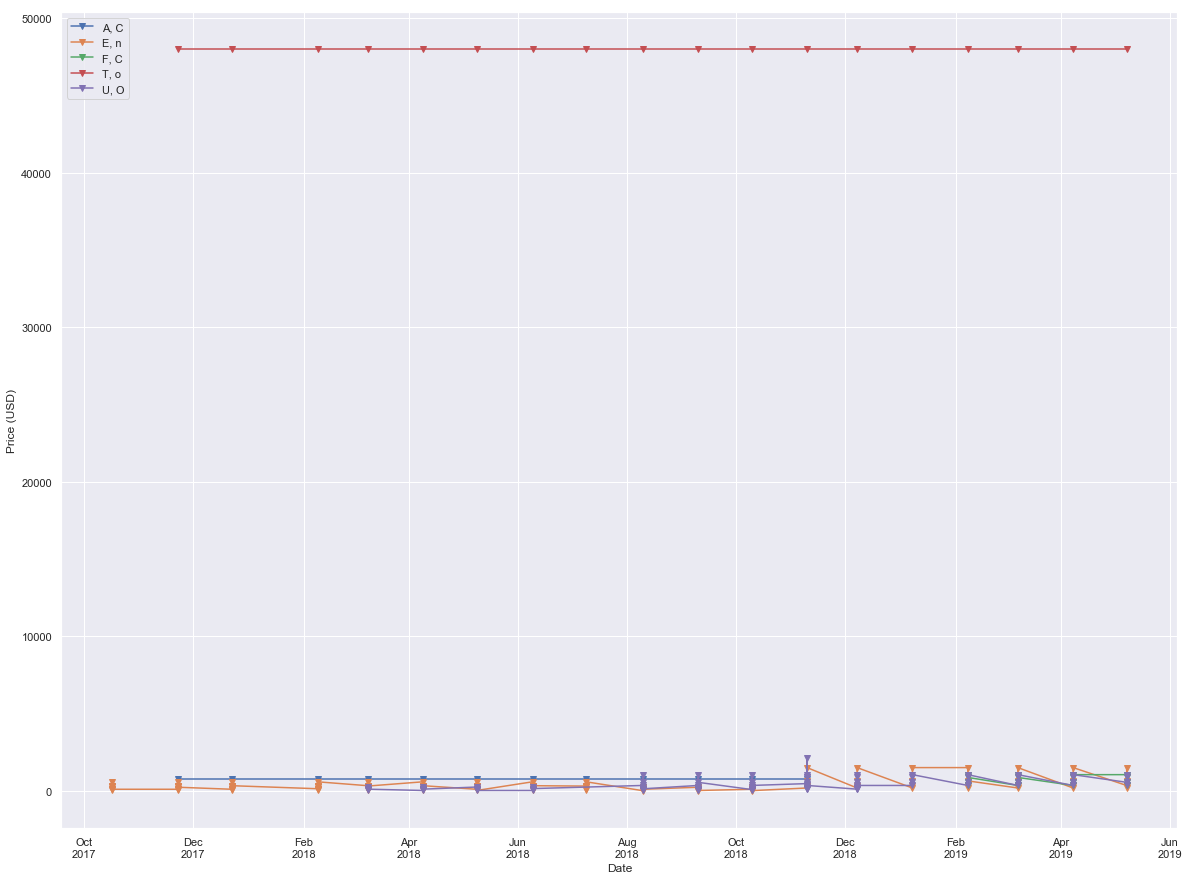

In [12]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [13]:
df.price[df.provider_name == 'ACC Corporation']
    

date
2017-11-22 19:12:59    733.43
2017-12-22 19:18:05    733.43
2018-02-08 19:06:10    733.43
2018-03-08 19:08:49    733.43
2018-04-08 18:09:03    733.43
2018-05-08 18:11:25    733.43
2018-06-09 02:18:45    733.43
2018-07-09 02:19:07    733.43
2018-08-09 17:55:41    733.43
2018-09-09 17:59:44    733.43
2018-10-09 17:59:47    733.43
2018-11-09 18:59:50    733.43
Name: price, dtype: float64

In [14]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Deprenyl (1g)',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_df:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('ACC Corporation', 'Enamine Ltd Chemspac…